In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus

In [2]:
iris = datasets.load_iris() 
X = iris.data
y = iris.target

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler=StandardScaler()

In [5]:
X=scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [14]:
clf=DecisionTreeClassifier(max_depth=10)

In [15]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
clf.score(X_test,y_test)

0.96666666666666667

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
class_names=iris.target_names)

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data)  

In [23]:
from sklearn.datasets import load_boston

In [24]:
boston=load_boston()

In [25]:
import pandas as pd

In [26]:
X=pd.DataFrame(boston.data)

In [27]:
y=boston.target

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf=DecisionTreeClassifier(max_depth=3)

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [59]:
fvalue_selector = SelectKBest(f_classif, k=2)

In [60]:
X_kbest = fvalue_selector.fit_transform(iris.data, iris.target)

In [65]:
y=iris.target

In [66]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

('Original number of features:', 13)
('Reduced number of features:', 2)


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf=DecisionTreeClassifier(max_depth=3)

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X_kbest,y,test_size=0.3)

In [70]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [71]:
clf.score(X_test,y_test)

0.93333333333333335

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
y_pred=clf.predict(X_test)

In [74]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 21]])

In [75]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.83      0.91      0.87        11
          2       0.95      0.91      0.93        23

avg / total       0.94      0.93      0.93        45



In [79]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [80]:
from sklearn.metrics import roc_curve

In [91]:
fpr, tpr, thresholds =roc_curve(y_test,y_pred,pos_label=2)

In [92]:
fpr

array([ 0.        ,  0.04545455,  0.5       ,  1.        ])

In [88]:
roc_auc = dict()

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

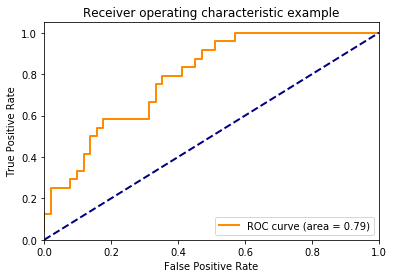

In [95]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()